In [1]:
%pylab inline
import sys
sys.path.append('./Stracers/')
import weights
import tracers_properties
import soda
# move to Jellyfish
from pygadgetreader import readsnap

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
def read_snap(path, truncate=1):
    snapshot = path#'./halos/LMC1_97K_vir_000'


    pp = readsnap(snapshot, 'pos', 'dm')
    vv = readsnap(snapshot, 'vel', 'dm')
    mass = readsnap(snapshot, 'mass', 'dm')
    Epp = readsnap(snapshot, 'pot', 'dm')
    ids = readsnap(snapshot, 'pid', 'dm')


    r = np.sqrt(pp[:,0]**2+pp[:,1]**2+pp[:,2]**2)

    # truncating the halo

    if truncate == 1:
        print('Truncating the halo!')
        r_cut = index = np.where((r<300) & (r>0))[0]

        pp = pp[r_cut]
        r = r[r_cut]
        vv = vv[r_cut]
        mass = mass[r_cut]
        Epp = Epp[r_cut]
        ids = ids[r_cut]
    

    v = np.sqrt(vv[:,0]**2 + vv[:,1]**2 + vv[:,2]**2)
    
    return r, Epp, v, mass*1E10, ids, pp, vv


In [4]:
from pygadgetreader import readheader

readheader('./halos/LMC1_97K_vir_080', 'time')

1.5999999977648258

In [5]:
r0, Epp0, v0, mass0, ids0, pp0, vv0 = read_snap('./halos/LMC1_97K_vir_000')
r4, Epp4, v4, mass4, ids4, pp4, vv4 = read_snap('./halos/LMC1_97K_vir_100', truncate=0)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Potential
Returning DM    Particle IDs
Truncating the halo!
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Potential
Returning DM    Particle IDs


# Computing weights:

In [6]:
w0 = weights.weights(r0, Epp0, v0, mass0[0], 1e10, profiles='Hernquist', profile_params=[3])

Number of particles :  95199
1.94758518491 95199


In [7]:
# weights for future snapshot
pos_4, vel_4, mass_4 = weights.weights_snapshot(w0, ids0, ids4, pp4, vv4, mass4)

In [8]:
r0_binned, rho0 = tracers_properties.den_profile(r0, mass0 ,100, 100)
r4_binned, rho4 = tracers_properties.den_profile(r4, mass4 ,100, 100)

r0_st_binned, rho_st0 = tracers_properties.den_profile(r0, mass0*w0*1E10, 100, 100)
r4_st_binned, rho_st4 = tracers_properties.den_profile((pos_4[:,0]**2 + pos_4[:,1]**2 + pos_4[:,2]**2)**0.5, mass_4*w0*1E10, 100, 100)

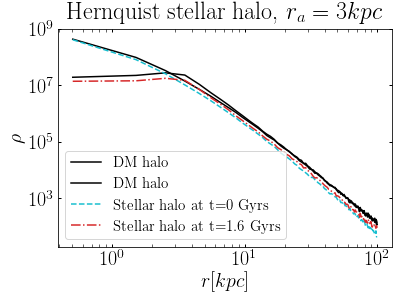

In [9]:
title('Hernquist stellar halo, $r_a=3 kpc$')
loglog(r0_binned[:-1], rho0, c='k', label='DM halo')
loglog(r4_binned[:-1], rho4, c='k', label='DM halo')

loglog(r0_st_binned[:-1], rho_st0, c='C9', ls='--', label='Stellar halo at t=0 Gyrs')
loglog(r4_st_binned[:-1], rho_st4, c='C3', ls='-.', label='Stellar halo at t=1.6 Gyrs')
legend(fontsize=15)
xlabel('$r[kpc]$')
ylabel(r'$\rho$')

savefig('./doc/stellar_halo_hernquist.pdf', bbox_inches='tight')

Number of particles :  95199
1.90956471143 95199
Number of particles :  95199
1.78065103365 95199
Number of particles :  95199
1.51673798483 95199
Number of particles :  95199
1.07853431283 95199


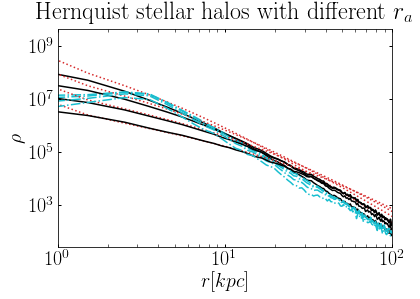

In [20]:
r_a = [5, 10, 20, 40]


for i in range(len(r_a)):
    w1 = weights.weights(r0, Epp0, v0, mass0[0], 1e10, profiles='Hernquist', profile_params=[r_a[i]])
    pos_4_st, vel_4_st, mass_4_st = weights.weights_snapshot(w1, ids0, ids4, pp4, vv4, mass4)
    
    r_i = (pos_4_st[:,0]**2 + pos_4_st[:,1]**2 + pos_4_st[:,2]**2)**0.5
    r_st0, rho_st0 = tracers_properties.den_profile(r0, mass0*w1*1E10, 100, 100)
    r_st4, rho_st4 = tracers_properties.den_profile(r_i, mass_4_st*w1*1E10, 100, 100)
    rho_t = soda.profiles.dens_hernquist(r_a[i], linspace(0.1, 100, 100), 0, 0, np.sum(mass0))
    
    loglog(r_st0[:], rho_t, c='C3', ls=':')
    loglog(r_st0[:-1], rho_st0, c='k', ls='-')
    loglog(r_st4[:-1], rho_st4, c='C9', ls='-.')
    
#legend(fontsize=15)
#loglog(r0_st_binned[:-1], rho0, label='DM halo', c='C7')
#loglog(rho_t, c='C3', ls=':', lw=1.5, label='Analytic')
#loglog(rho_st0, c='k', ls='-', label='stellar halo, t=0 Gyr')
#loglog(rho_st4, c='C9', ls='-.', label='stellar halo, t=1.6 Gyr')

xlabel('$r[kpc]$')
ylabel(r'$\rho$')
title('Hernquist stellar halos with different $r_a$')
xlim(1, 100)
legend(fontsize=15)
savefig('./doc/Hernquist_stellar_halos.pdf', bbox_inches='tight')
    

Number of particles :  95199
1.60052960476 95199
Number of particles :  95199
1.80415579912 95199
Number of particles :  95199
1.89818940157 95199
Number of particles :  95199
1.94074059966 95199


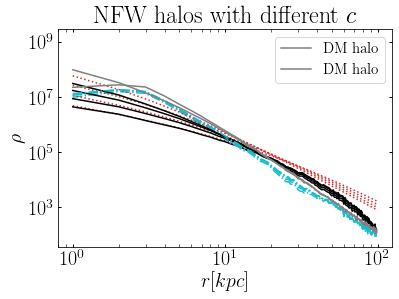

In [21]:
c = [5, 10, 20, 40]


for i in range(len(c)):
    w1 = weights.weights(r0, Epp0, v0, mass0[0], 1e10, profiles='NFW', profile_params=[c[i], 100])
    pos_4_st, vel_4_st, mass_4_st = weights.weights_snapshot(w1, ids0, ids4, pp4, vv4, mass4)
    r_i = (pos_4_st[:,0]**2 + pos_4_st[:,1]**2 + pos_4_st[:,2]**2)**0.5
    r0_st, rho_st0 = tracers_properties.den_profile(r0, mass0*w1*1E10, 100, 100)
    r4_st, rho_st4 = tracers_properties.den_profile(r_i, mass_4_st*w1*1E10, 100, 100)
    rho_t = soda.profiles.dens_NFWnRvir(c[i], linspace(0.1, 100, 100), 0, 0, np.sum(mass0), 100)
    loglog(rho_t, c='C3', ls=':')
    loglog(rho_st0, c='k', ls='-')
    loglog(rho_st4, c='C9', ls='-.')
#legend(fontsize=15)
loglog(rho0, label='DM halo', c='C7')
loglog(rho4, label='DM halo', c='C7')

#loglog(rho_t, c='C3', ls=':', lw=1.5, label='Analytic')
#loglog(rho_st0, c='k', ls='-', label='stellar halo, t=0 Gyr')
#loglog(rho_st4, c='C9', ls='-.', label='stellar halo, t=1.6 Gyr')

xlabel('$r[kpc]$')
ylabel(r'$\rho$')
title('NFW halos with different $c$')

legend(fontsize=15)
savefig('./doc/NFW_stellar_halos.pdf', bbox_inches='tight')
    

# Velocity dispersion
    

In [25]:
vr0, vtheta0, vphi0 = tracers_properties.velocity_dispersions_r(pp0, vv0, 100, 100, 0)
vr_st0, vtheta_st0, vphi_st0 = tracers_properties.velocity_dispersions_r(pp0, vv0, 100, 100, w0, weighted=1)
vr_st4, vtheta_st4, vphi_st4 = tracers_properties.velocity_dispersions_r(pos_4, vel_4, 100, 100, w0, weighted=1)

Computing the velocity dispersion profile for the stellar halo!
Computing the velocity dispersion profile for the stellar halo!


In [91]:
#sigma_rw, sigma_thetaw, sigma_phiw = velocity_dispersion_weights(pp0, vv0, w0)
#sigma_rw4, sigma_thetaw4, sigma_phiw4 = velocity_dispersion_weights(pp4, vv4, w0)


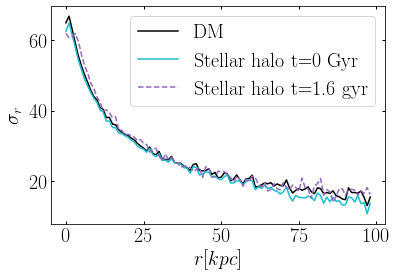

In [30]:
plot(vr0, label='DM', c='k')
plot(vr_st0, label='Stellar halo t=0 Gyr', c='C9')
plot(vr_st4, label='Stellar halo t=1.6 gyr', C='C4', ls='--')
legend()

xlabel('$r[kpc]$')
ylabel('$\sigma_r$')

savefig('./doc/velocity_dispersion_tracers_hernquist.pdf', bbox_inches='tight')

